# NLP IMDB Dataset

In [1]:
import pandas as pd 
import numpy as np

## Get data

In [2]:
df = pd.read_csv('files/IMDB Dataset.csv')
df.info() # 50,000 reviews and a target 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [3]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


## Some EDA

#### Sentiment Distribution 

In [8]:
import seaborn as sns
%matplotlib inline

<AxesSubplot:xlabel='sentiment', ylabel='Count'>

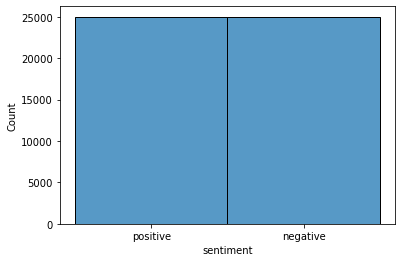

In [7]:
# 25000 positive and 25000 negative reviews
sns.histplot(data=df, x='sentiment')

#### Review Length

In [9]:
df['length'] = df['review'].apply(len)
df.head()

,review,sentiment,length
0,One of the other reviewers has mentioned that ...,positive,1761
1,A wonderful little production. <br /><br />The...,positive,998
2,I thought this was a wonderful way to spend ti...,positive,926
3,Basically there's a family where a little boy ...,negative,748
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,1317


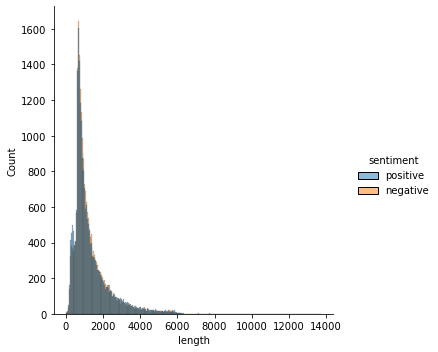

In [10]:
# Right Skewed, does not differ by sentiment  
sns.displot(data=df, x='length', hue='sentiment')

## Preprocessing

In [11]:
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [12]:
# Function that tokenizes text message
def text_process(review):
    """ 
    1. Remove punctuation
    2. Remove stop words
    3. Return list of clean text words
    Opt: For future, also do stemming (break down words into stems to add up derived words) and other text normalization methods
    """
    # Remove punctuation
    nopunc = [char for char in review if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    # Remove stop words
    clean = [word for word in nopunc.split() if word.lower() not in stopwords.words('English')]
    # Return list of clean words
    return clean

## Split data into train and test

In [13]:
from sklearn.model_selection import train_test_split

In [20]:
X = df['review']
y = df['sentiment']
    
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X, y, test_size=0.25)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3)

## Modelling 

### Logistic Regression 

#### Build and train model

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
from sklearn.pipeline import Pipeline

In [17]:
# build pipeline
lr_pipeline = Pipeline([
    # (step_name, what_to_do)
    
    # Step 1: Turn corpus into bag of words 
    ('bow', CountVectorizer(analyzer=text_process)),
    
    # Step 2: Give TF-IDF weights to bag of words
    ('tfidf', TfidfTransformer()),
    
    # Step 3: Fit classification model
    ('classifier', LogisticRegression(max_iter=2000))
])

In [66]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fbdf7fc9670>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', LogisticRegression(max_iter=2000))])

#### Make predictions

In [67]:
lr_pred = lr_pipeline.predict(X_valid)

#### Evaluate model performance

In [22]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

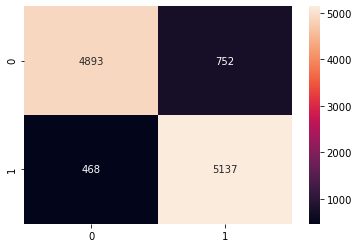

In [68]:
# 4893 TN 752 FP, 468 FN, 5137 TP
sns.heatmap(confusion_matrix(y_valid, lr_pred), annot=True, fmt='g')

In [69]:
# 89% accuracy, precision, recall, f1 score
print(classification_report(y_valid, lr_pred))

              precision    recall  f1-score   support

    negative       0.91      0.87      0.89      5645
    positive       0.87      0.92      0.89      5605

    accuracy                           0.89     11250
   macro avg       0.89      0.89      0.89     11250
weighted avg       0.89      0.89      0.89     11250



### K Nearest Neighbors

#### Build and train model

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [27]:
# build pipeline
knn_pipeline = Pipeline([
    # (step_name, what_to_do)
    
    # Step 1: Turn corpus into bag of words 
    ('bow', CountVectorizer(analyzer=text_process)),
    
    # Step 2: Give TF-IDF weights to bag of words
    ('tfidf', TfidfTransformer()),
    
    # Step 3: Fit classification model
    ('classifier', KNeighborsClassifier(n_neighbors=40))
])

In [28]:
knn_pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fbdf7fc9670>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', KNeighborsClassifier(n_neighbors=40))])

#### Make predictions

In [29]:
knn_pred = knn_pipeline.predict(X_valid)

#### Evaluate model performance

<AxesSubplot:>

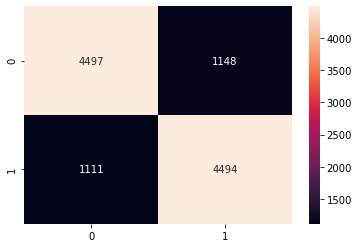

In [30]:
# 4497 TN 1148 FP, 1111 FN, 4494 TP
sns.heatmap(confusion_matrix(y_valid,knn_pred), annot=True, fmt='g')

In [31]:
# 80% accuracy, precision, recall, f1 score
print(classification_report(y_valid, knn_pred))

              precision    recall  f1-score   support

    negative       0.80      0.80      0.80      5645
    positive       0.80      0.80      0.80      5605

    accuracy                           0.80     11250
   macro avg       0.80      0.80      0.80     11250
weighted avg       0.80      0.80      0.80     11250



### Decision Tree

#### Build and train model

In [32]:
from sklearn.tree import DecisionTreeClassifier

In [33]:
# build pipeline
dt_pipeline = Pipeline([
    # (step_name, what_to_do)
    
    # Step 1: Turn corpus into bag of words 
    ('bow', CountVectorizer(analyzer=text_process)),
    
    # Step 2: Give TF-IDF weights to bag of words
    ('tfidf', TfidfTransformer()),
    
    # Step 3: Fit classification model
    ('classifier', DecisionTreeClassifier())
])

In [34]:
dt_pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fbdf7fc9670>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

#### Make predictions

In [35]:
dt_pred = dt_pipeline.predict(X_valid)

#### Evaluate model performance

<AxesSubplot:>

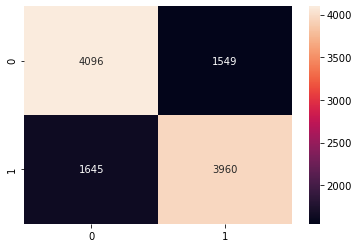

In [36]:
# 4096 TN 1549 FP, 1645 FN, 3960 TP
sns.heatmap(confusion_matrix(y_valid, dt_pred), annot=True, fmt='g')

In [37]:
# 72% accuracy, 72% precision, 72% recall, 72% f1 score
print(classification_report(y_valid, dt_pred))

              precision    recall  f1-score   support

    negative       0.71      0.73      0.72      5645
    positive       0.72      0.71      0.71      5605

    accuracy                           0.72     11250
   macro avg       0.72      0.72      0.72     11250
weighted avg       0.72      0.72      0.72     11250



### Random Forest 

#### Build and train model

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
# build pipeline
rf_pipeline = Pipeline([
    # (step_name, what_to_do)
    
    # Step 1: Turn corpus into bag of words 
    ('bow', CountVectorizer(analyzer=text_process)),
    
    # Step 2: Give TF-IDF weights to bag of words
    ('tfidf', TfidfTransformer()),
    
    # Step 3: Fit classification model
    ('classifier', RandomForestClassifier())
])

In [40]:
rf_pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fbdf7fc9670>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', RandomForestClassifier())])

#### Make predictions

In [41]:
rf_pred = rf_pipeline.predict(X_valid)

#### Evaluate model performance

<AxesSubplot:>

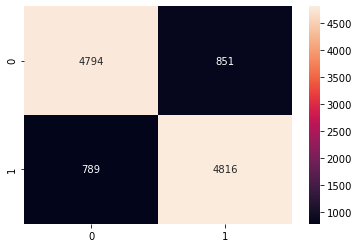

In [42]:
# 4794 TN 851 FP, 789 FN, 4816 TP
sns.heatmap(confusion_matrix(y_valid, rf_pred), annot=True, fmt='g')

In [43]:
# 85% accuracy, 85% precision, 85% recall, 85% f1 score
print(classification_report(y_valid, rf_pred))

              precision    recall  f1-score   support

    negative       0.86      0.85      0.85      5645
    positive       0.85      0.86      0.85      5605

    accuracy                           0.85     11250
   macro avg       0.85      0.85      0.85     11250
weighted avg       0.85      0.85      0.85     11250



### SVM

#### Build and train model

In [44]:
from sklearn.svm import SVC

In [45]:
# build pipeline
svm_pipeline = Pipeline([
    # (step_name, what_to_do)
    
    # Step 1: Turn corpus into bag of words 
    ('bow', CountVectorizer(analyzer=text_process)),
    
    # Step 2: Give TF-IDF weights to bag of words
    ('tfidf', TfidfTransformer()),
    
    # Step 3: Fit classification model
    ('classifier', SVC())
])

In [46]:
svm_pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fbdf7fc9670>)),
                ('tfidf', TfidfTransformer()), ('classifier', SVC())])

#### Make predictions

In [47]:
svm_pred = svm_pipeline.predict(X_valid)

#### Evaluate model performance

<AxesSubplot:>

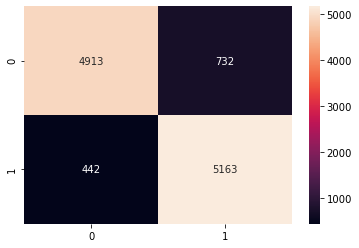

In [48]:
# 4913 TN 732 FP, 442 FN, 5163 TP
sns.heatmap(confusion_matrix(y_valid, svm_pred), annot=True, fmt='g')

In [49]:
# 90% accuracy, 90% precision, 90% recall, 90% f1 score
print(classification_report(y_valid, svm_pred))

              precision    recall  f1-score   support

    negative       0.92      0.87      0.89      5645
    positive       0.88      0.92      0.90      5605

    accuracy                           0.90     11250
   macro avg       0.90      0.90      0.90     11250
weighted avg       0.90      0.90      0.90     11250



### Naive Bayes

#### Build and train model

In [50]:
from sklearn.naive_bayes import MultinomialNB

In [51]:
# build pipeline
nb_pipeline = Pipeline([
    # (step_name, what_to_do)
    
    # Step 1: Turn corpus into bag of words 
    ('bow', CountVectorizer(analyzer=text_process)),
    
    # Step 2: Give TF-IDF weights to bag of words
    ('tfidf', TfidfTransformer()),
    
    # Step 3: Fit classification model
    ('classifier', MultinomialNB())
])

In [52]:
nb_pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fbdf7fc9670>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

#### Make predictions

In [53]:
nb_pred = nb_pipeline.predict(X_valid)

#### Evaluate model performance

<AxesSubplot:>

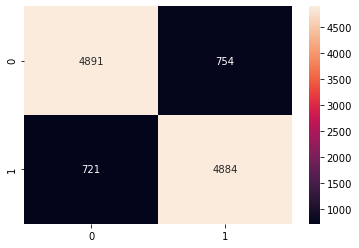

In [54]:
# 4891 TN 754 FP, 721 FN, 4884 TP
sns.heatmap(confusion_matrix(y_valid, nb_pred), annot=True, fmt='g')

In [55]:
# 87% accuracy, 87% precision, 87% recall, 87% f1 score
print(classification_report(y_valid, nb_pred))

              precision    recall  f1-score   support

    negative       0.87      0.87      0.87      5645
    positive       0.87      0.87      0.87      5605

    accuracy                           0.87     11250
   macro avg       0.87      0.87      0.87     11250
weighted avg       0.87      0.87      0.87     11250



### Neural Network

#### Build and train model

In [56]:
from sklearn.neural_network import MLPClassifier

In [57]:
# build pipeline
nn_pipeline = Pipeline([
    # (step_name, what_to_do)
    
    # Step 1: Turn corpus into bag of words 
    ('bow', CountVectorizer(analyzer=text_process)),
    
    # Step 2: Give TF-IDF weights to bag of words
    ('tfidf', TfidfTransformer()),
    
    # Step 3: Fit classification model
    ('classifier', MLPClassifier(max_iter=2000))
])

In [58]:
nn_pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function text_process at 0x7fbdf7fc9670>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MLPClassifier(max_iter=2000))])

#### Make predictions

In [59]:
nn_pred = nn_pipeline.predict(X_valid)

#### Evaluate model performance

<AxesSubplot:>

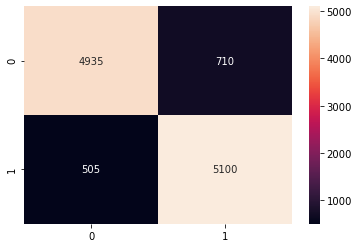

In [60]:
# 4935 TN 710 FP, 505 FN, 5100 TP
sns.heatmap(confusion_matrix(y_valid, nn_pred), annot=True, fmt='g')

In [61]:
# 89% accuracy, precision, recall, f1 score
print(classification_report(y_valid, nn_pred))

              precision    recall  f1-score   support

    negative       0.91      0.87      0.89      5645
    positive       0.88      0.91      0.89      5605

    accuracy                           0.89     11250
   macro avg       0.89      0.89      0.89     11250
weighted avg       0.89      0.89      0.89     11250



## Deployment

              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      6339
    positive       0.88      0.92      0.90      6161

    accuracy                           0.89     12500
   macro avg       0.90      0.90      0.89     12500
weighted avg       0.90      0.89      0.89     12500



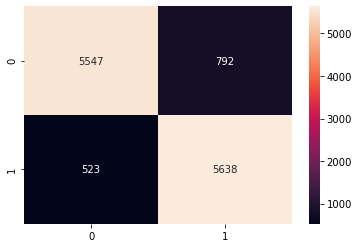

In [63]:
svm_predictions = svm_pipeline.predict(X_test)
# 5547 TN 792 FP, 523 FN, 5638 TP
sns.heatmap(confusion_matrix(y_test, svm_predictions), annot=True, fmt='g')
# 89% accuracy, 90% precision, 89% recall, 89% f1 score
print(classification_report(y_test, svm_predictions))

              precision    recall  f1-score   support

    negative       0.91      0.88      0.89      6339
    positive       0.88      0.91      0.89      6161

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



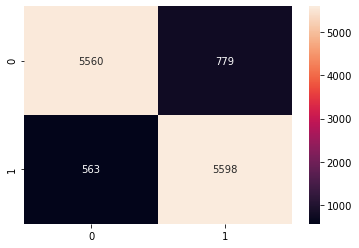

In [64]:
nn_predictions = nn_pipeline.predict(X_test)
# 5560 TN 779 FP, 563 FN, 5598 TP
sns.heatmap(confusion_matrix(y_test, nn_predictions), annot=True, fmt='g')
# 89% accuracy, precision, recall, f1 score
print(classification_report(y_test, nn_predictions))

              precision    recall  f1-score   support

    negative       0.91      0.87      0.89      6339
    positive       0.87      0.91      0.89      6161

    accuracy                           0.89     12500
   macro avg       0.89      0.89      0.89     12500
weighted avg       0.89      0.89      0.89     12500



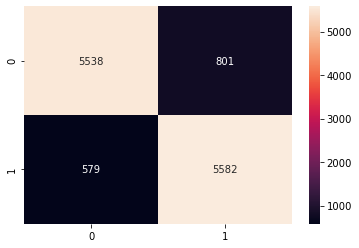

In [70]:
lr_predictions = lr_pipeline.predict(X_test)
# 5538 TN 801 FP, 579 FN, 5582 TP
sns.heatmap(confusion_matrix(y_test, lr_predictions), annot=True, fmt='g')
# 89% accuracy, precision, recall, f1 score
print(classification_report(y_test, lr_predictions))

              precision    recall  f1-score   support

    negative       0.87      0.87      0.87      6339
    positive       0.87      0.87      0.87      6161

    accuracy                           0.87     12500
   macro avg       0.87      0.87      0.87     12500
weighted avg       0.87      0.87      0.87     12500



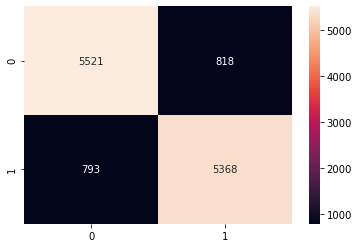

In [65]:
nb_predictions = nb_pipeline.predict(X_test)
# 5521 TN 818 FP, 793 FN, 5368 TP
sns.heatmap(confusion_matrix(y_test, nb_predictions), annot=True, fmt='g')
# 87% accuracy, precision, recall, f1 score
print(classification_report(y_test, nb_predictions))

### Best models
* SVM
* Neural Network
* Logistic Regression
* Naive Bayes